## 1.前言
首先申明这是我的个人的实验楼学习笔记，教程中代码均来之实验楼，自己只是做整理分享给大家，希望对大家有所帮助，数据清洗是数据分析中非常重要的一部分，也最繁琐，做好这一步需要大量的经验和耐心。接下来我将和大家一起，一步步完成这项工作。

## 2.数据清洗
### 2.1检查数据
数据清洗的第一步是检查数据，我们一般会检查数据的类别分布是否平衡、特征值的格式和分布、完整性（是否存在缺失数据）、合法性、唯一性、一致性等。
#### 2.1.1.准备数据 导入数据集并查看数据

In [87]:
import pandas as pd
import pandas as pd

target_url = "http://labfile.oss.aliyuncs.com/courses/1001/train.csv"

data = pd.read_csv(target_url)  
print("数据集规模：",data.shape)
print(data.head(5))

数据集规模： (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [62]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### 2.1.2特征介绍

我们导入的数据集 data，每行是一个训练样例（即游客），每列是该样例的特征。 其中 Suivived 代表游客是否存活（0 或 1），这是一个二分类问题（死亡 或 生存）。下面是各特征的详细说明：

- PassengerId: 编号
- Survived: 0 = 死亡，1 = 生存
- Pclass: 船票级别 1 = 高级， 2 = 中等， 3 = 低等
- name: 名称
- Sex: male = 男性，female = 女性
- Age: 年龄
- SibSp: 在 Titanic 上的兄弟姐妹以及配偶的人数
- Parch: 在 Titanic 上的父母以及子女的人数
- Ticket: 船票编号
- Fare: 工资
- Cabin: 所在的船舱
- Embarked: 登船的港口 C = Cherbourg, Q = Queenstown, S = Southampton

#### 2.1.3.检查数据
首先第一步检查数据完整性

In [63]:
print(len(data))
print(data.isnull().sum())

891
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


总共有 891 个游客的数据，177 个 Age 缺失，687 个 Cabin 缺失，2 个 Embarked 缺失。在后面我们需要用不同的方法补充这些数据。

然后，我们查看特征类别分布是否平衡。类别平衡指分类样例不同类别的训练样例数目差别不大。当差别很大时，为类别不平衡。当类别不平衡的时候，例如正反比为 9:1，学习器将所有样本判别为正例的正确率都能达到 0.9。这时候，我们就需要使用 “再缩放”、“欠采样”、“过采样”、“阈值移动” 等方法。

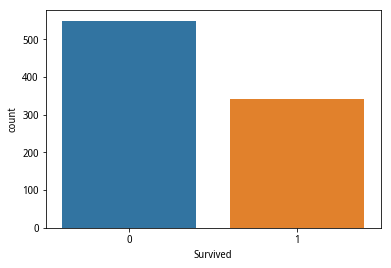

In [64]:
import seaborn as sns
sns.countplot(x="Survived",data=data)

图的纵坐标表示在不同类别下的人数。相差不是特别大，我们认为属于类别平衡问题。

接下来，我们查看特征值分布和格式。在这里，我们观察每个特征特征值是什么格式，怎么分布，维度如何。

In [65]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Cabin, Embarked 等特征值数值化
Ticket 等高维数据降维处理并将特征值数值化
Fare，Age 等为连续数据，之后需要检查是否是偏态数据
接下来，删除无用的特征 PassengerId, Name。

#### 2.2.2.相关系数分析

<a href="https://www.zhihu.com/question/20852004/answer/129508585">知乎相关系数、协方差讨论</a>

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


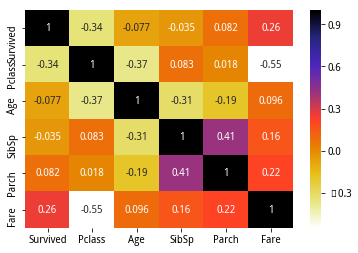

In [66]:
data.drop(['PassengerId','Name'],axis=1,inplace=True)
#cmap = sns.cubehelix_palette(light=0.75, as_cmap=True)
print(data.columns)
sns.heatmap(data[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr(),cmap='CMRmap_r',annot=True)

数值越大，相关性越大。Fare和Survived有较大的正相关性。

#### 2.2.3.缺失值
根据不同的情况，可以使用中位数、平均数、众数填充，删除等方法处理缺失值，较复杂的方法还有建模预测。

**Age**

作图Age~Survived。年龄较小的孩子生存几率大。补充缺失值后，我们必须检查对Age~Survived的性质产生的影响。

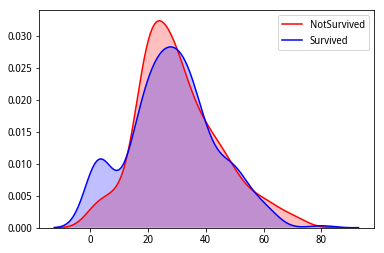

In [67]:
Age0=data[(data['Survived']==0)&(data['Age'].notnull())]['Age']
Age1=data[(data['Survived']==1)&(data['Age'].notnull())]['Age']
g=sns.kdeplot(Age0,legend=True,shade=True,color='r',label='NotSurvived')
g=sns.kdeplot(Age1,legend=True,shade=True,color='b',label='Survived')

在2.2.2节中，根据heatmap,Age和SibSp,Parch,Pclass相关性高，我们再用箱型图直观感受一下，以图形Sex~Age,Pclass~Age为例

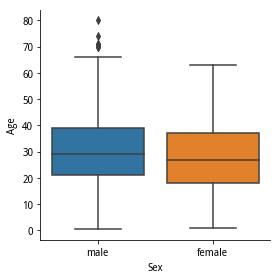

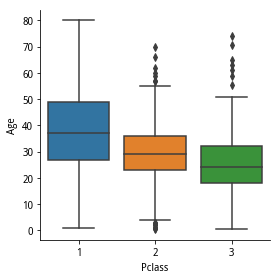

In [68]:
g=sns.factorplot(x='Sex',y='Age',data=data,kind='box')
g=sns.factorplot(x='Pclass',y='Age',data=data,kind='box')

上面靓图说明男性和女性的年龄分布（指箱型图中的五条线，从上到下一次的最大值、四分位、中位数、四分位、最小值）基本一致，而购买不同等级票的人的年龄分布则是不同的。所以，问你根据票的等级将数据分为不同的集合，再用缺失数据所在集合的平均值来进行填充，并检查填充后的Age~Survived是否受到影响。

/opt/conda/envs/python3new/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


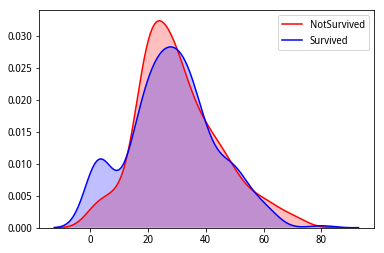

In [69]:
index = list(data[data['Age'].isnull()].index)
Age_mean = np.mean(data[data['Age'].notnull()]['Age'])
copy_data = data.copy()
for i in index:
    filling_age = np.mean(copy_data[(copy_data['Pclass'] == copy_data.iloc[i]['Pclass'])
                                    & (copy_data['SibSp'] == copy_data.iloc[i]['SibSp'])
                                    & (copy_data['Parch'] == copy_data.iloc[i]['Parch'])
                                    ]['Age'])
    if not np.isnan(filling_age):
        data['Age'].iloc[i] = filling_age
    else:
        data['Age'].iloc[i] = Age_mean
g = sns.kdeplot(Age0, legend=True, shade=True, color='r', label='NotSurvived')
g = sns.kdeplot(Age1, legend=True, shade=True, color='b', label='Survived')

**Embarked**

对于只有极少数缺失值的特征，我们可以选择删除改样本，使用众数、均值、中位数等填充。

**Cabin**

对于这种复杂，高纬的数据，我们需要挖掘它的规律。例如Cabin特征值由字母开头，判断船舱按字母分为A.B.C...于是我们仅提取字母编号，降低维度，然后使用'U'填充数据。

In [70]:
data[data['Cabin'].notnull()]['Cabin'].head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


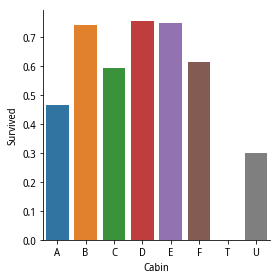

In [71]:
data['Cabin'].fillna('U',inplace=True)
data['Cabin']=data['Cabin'].map(lambda i: list(i)[0])
g = sns.factorplot(x='Cabin',y='Survived',data=data,ci=False,kind='bar',order=['A','B','C','D','E','F','T','U'])
print(data.columns)

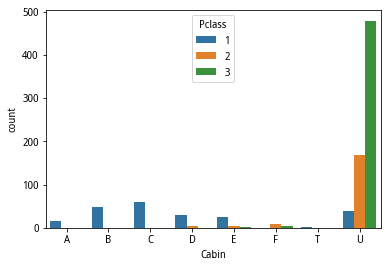

In [72]:
g = sns.countplot(x='Cabin',hue='Pclass',data=data,order=['A','B','C','D','E','F','T','U'])

从上图中看出，缺失数据的游客主要是三等仓的，并且这部分游客的生产率想对较低。

#### 2.2.4偏态分布

偏态分布的数据有时不利于模型发现数据中的规律，我们可以使用Log Transformation来出来数据，参考<a  href='http://www.statisticshowto.com/probability-and-statistics/skewed-distribution/'>Skewed Distribution and Log Transformation

Skew Coefficient:4.79


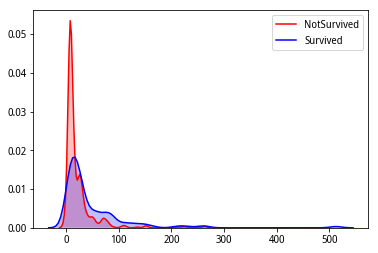

In [73]:
g=sns.kdeplot(data[data['Survived']==0]['Fare'],shade='True',label='NotSurvived',color='r')
g=sns.kdeplot(data[data['Survived']==1]['Fare'],shade='True',label='Survived',color='b')
print('Skew Coefficient:%.2f' %(data['Fare'].skew()))

Skew Coefficient:0.44


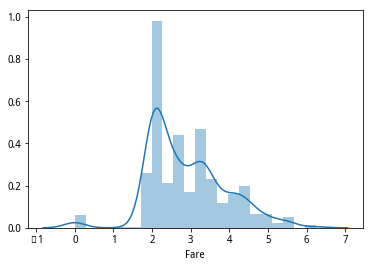

In [74]:
data['Fare']=data['Fare'].map(lambda i:np.log(i) if i>0 else 0)
g=sns.distplot(data['Fare'])
print('Skew Coefficient:%.2f' %(data['Fare'].skew()))

Fare属于右偏态分布，Python提供了计算数据偏态系数的函数skew()，计算值越大，数据偏态越明显。使用Log Transformation后，我们看到计算值从4.79降到0.44

#### 2.2.5数值化和标准化
**Ticket**

Ticket特征值中的一串数字编号对我们没有意义，忽略。下面代码中，我们使用正则表达式过滤掉这串数字，并使用pandas.get_dummies函数进行数值化(以Ticket特征值作为新的特征，0,1做为新的特征)。参考<a href='http://www.runoob.com/regexp/regexp-syntax.html'>正则表达式<a/>

In [75]:
Ticket=[]
import re
r=re.compile(r'\w*')
for i in data['Ticket']:
    sp=i.split(' ')
    if len(sp)==1:
       Ticket.append('U')
    else:
       t=r.findall(sp[0])
       Ticket.append(''.join(t)) 
data['Ticket']=Ticket
data=pd.get_dummies(data,columns=['Ticket'],prefix='T')

In [82]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'T_A4', 'T_A5', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC',
       'T_FCC', 'T_Fa', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH',
       'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP',
       'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2', 'T_SWPP',
       'T_U', 'T_WC', 'T_WEP'],
      dtype='object')

**Sex**

Sex只有male,female两个特征值，用0替代male,1替代female

In [88]:
print(data['Sex'].head(5))
data['Sex'].replace('male',0,inplace=True)
data['Sex'].replace('female',1,inplace=True)
print(data['Sex'].head(5))

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object
0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


#### 2.2.6离群点
离群点是显著偏离数据集里其余对象的点。离群点来源于操作失误，数据本身的可变行等。在不同的环境中，离群点扮演不同角色。例如一个人的年龄300岁，明显不正常，应当删除，而某些环境中，我们却需要探测、研究离群点，例如欺诈检测。我们这里采用箱线法，检测特征['Age','Parch','SibSp','Fare']的离群点。参考<a href='http://blog.csdn.net/littlely_ll/article/details/68486537'>离群点和箱线法</a>

In [84]:
from collections import Counter


def outlier_detect(n, df, features):
    outlier_index = []
    for feature in features:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_span = 1.5 * IQR
        col = ((data[data[feature] > Q3 + outlier_span]) |
               (data[data[feature] < Q1 - outlier_span])).index
        outlier_index.extend(col)
        print('%s: %f (Q3+1.5*IQR) , %f (Q1-1.5*QIR) )' %
              (feature, Q3 + outlier_span, Q1 - outlier_span))
    outlier_index = Counter(outlier_index)
    outlier = list(i for i, j in outlier_index.items() if j >= n)
    print('number of outliers: %d' % len(outlier))
    print(df[['Age', 'Parch', 'SibSp', 'Fare']].loc[outlier])
    return outlier


outlier = outlier_detect(3, data, ['Age', 'Parch', 'SibSp', 'Fare'])

Age: 59.500000 (Q3+1.5*IQR) , -0.500000 (Q1-1.5*QIR) )
Parch: 0.000000 (Q3+1.5*IQR) , 0.000000 (Q1-1.5*QIR) )
SibSp: 2.500000 (Q3+1.5*IQR) , -1.500000 (Q1-1.5*QIR) )
Fare: 5.482703 (Q3+1.5*IQR) , 0.019461 (Q1-1.5*QIR) )
number of outliers: 4
      Age  Parch  SibSp      Fare
438  64.0      4      1  5.572154
27   19.0      2      3  5.572154
88   23.0      2      3  5.572154
341  24.0      2      3  5.572154


## 3.实验总结
本次实验我们实验了数据清洗的基本思路，希望大家可以从中学习数据清洗的基本思路以及具体操作，同时练习使用 Pandas 数据分析工具、Seaborn 统计分析可视化工具。好了，本次实验到此结束，敬请期待下一篇分类模型训练及评价简介。